# Installation

In [70]:
from itertools import combinations

import matplotlib.pyplot as plt
import spacy
from spacy import displacy

In [2]:
%%html
<style>
table {float:left}
</style>

# SpaCy 

* [Architecture](https://spacy.io/usage/spacy-101#architecture)

> The central data structures in spaCy are the [Language class](https://spacy.io/api/language), the Vocab and the Doc object. The Language class is used to process a text and turn it into a Doc object. It’s typically stored as a variable called nlp. The Doc object owns the sequence of tokens and all their annotations. By centralizing strings, word vectors and lexical attributes in the Vocab, we avoid storing multiple copies of this data. This saves memory, and ensures there’s a single source of truth.
> 
> Text annotations are also designed to allow a single source of truth: the Doc object owns the data, and Span and Token are views that point into it. The Doc object is constructed by the Tokenizer, and then modified in place by the components of the pipeline. The Language object coordinates these components. It takes raw text and sends it through the pipeline, returning an annotated document. It also orchestrates training and serialization.

<img src="image/spacy_architecture.png" align="left" width=500/>

| NAME      | DESCRIPTION                                                                                                                                             |
|:-----------|:---------------------------------------------------------------------------------------------------------------------------------------------------------|
| Doc       | A container for accessing linguistic annotations.                                                                                                       |
| DocBin    | A collection of Doc objects for efficient binary serialization. Also used for training data.                                                            |
| Example   | A collection of training annotations, containing two Doc objects: the reference data and the predictions.                                               |
| Language  | Processing class that turns text into Doc objects. Different languages implement their own subclasses of it. The variable is typically called ```nlp```.      |
| Lexeme    | An entry in the vocabulary. It’s a word type with no context, as opposed to a word token. It therefore has no part-of-speech tag, dependency parse etc. |
| Span      | A slice from a Doc object.                                                                                                                              |
| SpanGroup | A named collection of spans belonging to a Doc.                                                                                                         |
| Token     | An individual token — i.e. a word, punctuation symbol, whitespace, etc.                                                                                 |

# Language Processing Pipeline 

Pretrained Pipepeline (Pretrained Language Processing Pipeline) is the SpaCy runtime to do the work.

* [Language Processing Pipelines](https://spacy.io/usage/processing-pipelines)

<img src="image/spacy_processing_pipeline.png" align="left" width=750/>

## Load the Language Model for the pipeline

A Pretrained Pipeline is instantiated by loading a pretrained model. It is also called **[Language](https://spacy.io/api/language) Object** and by convention ```nlp``` is the object name.

* [Trained Models & Pipelines](https://spacy.io/models)

```
nlp = spacy.load("<language>-<type>-<genre>-<size>")
```

> * Type: Capabilities (e.g. core for general-purpose pipeline with tagging, parsing, lemmatization and named entity recognition, or dep for only tagging, parsing and lemmatization).
> * Genre: Type of text the pipeline is trained on, e.g. web or news.
> *  Size: Package size indicator, ```sm```, ```md```, ```lg``` or ```trf```. ```sm``` and ```trf``` pipelines have no static word vectors. 

```trf``` means **Transformer**.

> For pipelines with default vectors, ```md``` has a reduced word vector table with 20k unique vectors for ~500k words and ```lg``` has a large word vector table with ~500k entries. For pipelines with floret vectors, md vector tables have 50k entries and lg vector tables have 200k entries.  

```en_core_web_sm``` is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities.



In [3]:
# By convention "nlp" is the pipeline instance name
nlp = spacy.load("en_core_web_lg")

# Vocabulary

spaCy stores all shared data in a vocabulary, the Vocab. This includes words, but also the labels schemes for tags and entities. To save memory, all strings are encoded to hash IDs. 

In [7]:
type(nlp.vocab.strings)

spacy.strings.StringStore

In [13]:
# Look up the hash for the string label "email"
email_hash = nlp.vocab.strings["email"]
print(email_hash)

# Look up the person_hash to get the string
email_string = nlp.vocab.strings[email_hash]
print(email_string)

7320900731437023467
email


---

# Document

The pipeline process a text sequence by going through the steps and generated a [document](https://spacy.io/api/doc) object that has a sequence of tokens with linguistic annotations.

1. Tokenization
2. Part-of-speech taggging 
3. Syntactic dependency graph parsing
4. NER
5. Lemmatization

A [statistical model](https://spacy.io/usage/spacy-101#statistical-models) is used for steps 2 and 3.

<img src="image/spacy_pipeline_steps.png" align="left" width=800/>

In [90]:
doc = nlp("""
Hello Dr. Levance, hope you have been well. 
I am writing this email about the patcient Macky Robert who had injury.
Apple is looking at buying U.K. startup for $1 billion. 
Softbank acquired ARM with $32 billion in 2016.
Sushi goes well with soy source.
""")

# Sentences

In [87]:
sentences = doc.sents
similarities = []
previous = next(sentences)
for sentence in sentences:
    similarities.append(sentence.similarity(previous))

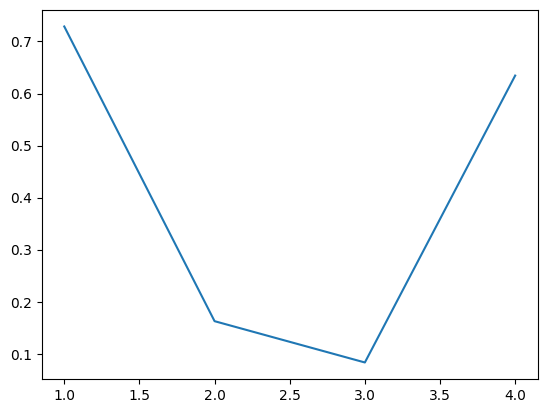

In [88]:
plt.plot(list(range(1, 1+len(similarities))), similarities)

# Annotations

[Token](https://spacy.io/api/token) is annotated with Part-of-Speech Tag, Syntactic dependency, and Lemma labels.


* Text: The original word text.
* Lemma: The base form of the word.
* POS (Part of Speech): The simple UPOS part-of-speech tag.
* Tag: The detailed part-of-speech tag.
* Dep: Syntactic dependency, i.e. the relation between tokens.
* Shape: The word shape – capitalization, punctuation, digits.
* is alpha: Is the token alphanumeric character word consisting of (a-z0-9)?
* is stop: Is the token part of a stop list, i.e. the most common words of the language?

<img src="image/spacy_parsed_document.png" align="left" width=800/>

### POS

* ADJ: adjective, e.g. big, old, green, incomprehensible, first
* ADP: adposition, e.g. in, to, during
* ADV: adverb, e.g. very, tomorrow, down, where, there
* AUX: auxiliary, e.g. is, has (done), will (do), should (do)
* CONJ: conjunction, e.g. and, or, but
* CCONJ: coordinating conjunction, e.g. and, or, but
* DET: determiner, e.g. a, an, the
* INTJ: interjection, e.g. psst, ouch, bravo, hello
* NOUN: noun, e.g. girl, cat, tree, air, beauty
* NUM: numeral, e.g. 1, 2017, one, seventy-seven, IV, MMXIV
* PART: particle, e.g. ’s, not,
* PRON: pronoun, e.g I, you, he, she, myself, themselves, somebody
* PROPN: proper noun, e.g. Mary, John, London, NATO, HBO
* PUNCT: punctuation, e.g. ., (, ), ?
* SCONJ: subordinating conjunction, e.g. if, while, that
* SYM: symbol, e.g. $, %, §, ©, +, −, ×, ÷, =, :), 😝
* VERB: verb, e.g. run, runs, running, eat, ate, eating
* X: other, e.g. sfpksdpsxmsa
* SPACE: space, e.g.

### TAG

* NNP: Proper noun, singular.
* VBD: Verb, past tense.
* IN: Conjunction, subordinating or preposition.

### Dependency Graph (DEP)
Dependency is an arc label, which describes the type of syntactic relation that connects the child to the head.

* nsubj: Nominal subject.
* compound: a compound word, which is a word made up of two or more words that function as a single unit.
* aux: Auxiliary verb, used in combination with a main verb to indicate tense, aspect, or voice.
* ROOT: Root node of a dependency grammar syntactic dependency structure or the word that is most responsible for determining the distribution of that phrase as a whole is its root.
* dobj: Direct object of the verb
* prep: Preposition.
* pcomp: Prepositional complement, to identify the complement of a preposition in a sentence. A complement of a preposition is a phrase or clause that completes the meaning of the preposition.
* pobj: Prepositional object as the object of a preposition. e.g. ```billion``` is the pobj of ```for``` in ```for $1billion```.


### Access Annotation

In Spacy, an object ```name``` refers to a hashed value, not a string. To get the string value, use ```name_```.

* [Part-of-speech tagging](https://spacy.io/usage/linguistic-features#pos-tagging)

> spaCy **encodes all strings to hash values** to reduce memory usage and improve efficiency. So to get the readable string representation of an attribute, we need to **add an underscore ```_``` to its name**:

In [91]:
print("{}{}{}{}{}{}".format(
    "Token".ljust(15), "Lemma".ljust(15), "POS".ljust(10), "Tag".ljust(8), "Dependency".ljust(14), "StopWord"
))
print("-" * 80)
for token in doc:
    print(f"{token.text:15}{token.lemma_:15}{token.pos_:10}{token.tag_:8}{token.dep_:14}{token.is_stop:}")

Token          Lemma          POS       Tag     Dependency    StopWord
--------------------------------------------------------------------------------

              
              SPACE     _SP     dep           False
Hello          hello          INTJ      UH      intj          False
Dr.            Dr.            PROPN     NNP     compound      False
Levance        Levance        PROPN     NNP     npadvmod      False
,              ,              PUNCT     ,       punct         False
hope           hope           VERB      VBP     ROOT          False
you            you            PRON      PRP     nsubj         True
have           have           AUX       VBP     aux           True
been           be             AUX       VBN     ccomp         True
well           well           ADJ       JJ      acomp         True
.              .              PUNCT     .       punct         False

              
              SPACE     _SP     dep           False
I              I              PRON  

## Entities

Named Entities have been identified by NER in the document object.

* [Named Entities](https://spacy.io/usage/spacy-101#annotations-ner)

### Entity Labels
```
PERSON:      People, including fictional.
NORP:        Nationalities or religious or political groups.
FAC:         Buildings, airports, highways, bridges, etc.
ORG:         Companies, agencies, institutions, etc.
GPE:         Countries, cities, states.
LOC:         Non-GPE locations, mountain ranges, bodies of water.
PRODUCT:     Objects, vehicles, foods, etc. (Not services.)
EVENT:       Named hurricanes, battles, wars, sports events, etc.
WORK_OF_ART: Titles of books, songs, etc.
LAW:         Named documents made into laws.
LANGUAGE:    Any named language.
DATE:        Absolute or relative dates or periods.
TIME:        Times smaller than a day.
PERCENT:     Percentage, including ”%“.
MONEY:       Monetary values, including unit.
QUANTITY:    Measurements, as of weight or distance.
ORDINAL:     “first”, “second”, etc.
CARDINAL:    Numerals that do not fall under another type.
```

In [84]:
print("{}{}{}{}".format(
    "Token".ljust(15), "Start".ljust(7), "End".ljust(7), "Label".ljust(10)
))
print("-" * 40)

for ent in doc.ents:
    print(f"{ent.text:15}{ent.start_char:<7}{ent.end_char:<7}{ent.label_:10}")

Token          Start  End    Label     
----------------------------------------
1              6      7      CARDINAL  
Levance        20     27     PERSON    
Macky Robert   97     109    PERSON    
Apple          126    131    ORG       
U.K.           153    157    GPE       
$1 billion     170    180    MONEY     
Softbank       183    191    ORG       
ARM            201    204    ORG       
$32 billion    210    221    MONEY     
2016           225    229    DATE      


## Visualize Dependencies and Entities

* [Visualizers](https://spacy.io/usage/visualizers)
* [Visualization with displaCy](https://subscription.packtpub.com/book/data/9781800563353/2/ch02lvl1sec07/visualization-with-displacy)

In [85]:
displacy.serve(doc, style="dep", auto_select_port=True, page=False)

/Users/oonisim/venv/tf/lib/python3.9/site-packages/spacy/util.py:1785: UserWarning: [W124] 0.0.0.0:5000 is already in use, using the nearest available port 5001 as an alternative.
  warnings.warn(Warnings.W124.format(host=host, port=start, serve_port=port))
/Users/oonisim/venv/tf/lib/python3.9/site-packages/spacy/displacy/__init__.py:108: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5001 ...

Shutting down server on port 5001.


In [42]:
displacy.serve(doc, style="ent", auto_select_port=True, page=False)


Using the 'ent' visualizer
Serving on http://0.0.0.0:5001 ...

Shutting down server on port 5001.


## Extract Entities

In [59]:
text = "You can watch “The Happiest Country in the World” for free on SBS On Demand. Australian Melissa Georgiou (Melissa Georgiou) moved to Finland over a decade ago to seek happiness in one of the coldest and darkest places on Earth. “One of my favorite things about living here is that it's easy to get close to nature whether you're in a residential area or in the middle of the city,” Melissa said. Originally a teacher, 12 years ago, she switched from the beaches of Sydney to the dark winters and cold lakes of Finland, and has never looked back since. Melissa said, “For Finns, the concept of happiness is very different from the Australian concept of happiness. Finns, she said, are happy to accept portrayals of themselves as melancholy and stubborn — a popular local saying is, “People who have happiness must hide it.” “The first thing I noticed here is that you don't go to dinners or barbecues, and you don't talk about real estate. No one asks you where you live, what suburb do you live in, where your kids go to school.” The Finns seem quite happy with the status quo, and they don't always seem to want more. Melissa Georgio's Dark Night in Northern Europe Finland was named the happiest country in the world for the sixth year in a row in the “World Happiness Report” released by the United Nations. “The Nordic countries are often countries with (good) unemployment benefits, pensions, and other benefits,” explains happiness expert and researcher Frank Martela (Frank Martela). However, Frank said that Finland's position in the rankings often surprised its own people. “Finns, they're almost outraged because they don't think this can be true. We listen to sad music and hard rock.” “Therefore, happiness is not part of the Finnish self-image.” The other side of Finnish melancholy is a cultural focus on perseverance. Frank said it redefines the way Finns view happiness — a concept known as “sisu” — which is part of Finnish culture and is hard to translate directly, but can be understood as will, determination, perseverance, and reason to face adversity. This, he said, is best reflected in Finns' favorite pastime — getting warm in a sauna after taking a bath in freezing temperatures. “It's about this paradox — from one extreme to the other, and it's a pretty fun experience... because you need perseverance.” Melissa said, but Finland has many things that are great and can provide happiness for people in this country. Finland is one of the European countries least affected by the COVID-19 pandemic, and experts attribute this to a high level of trust in the government and little resistance to complying with restrictions. Trust in government, on the other hand, stems from a country's investment in its citizens. The public school system rarely tests children and is one of the best in the world. Finland also has a universal health care system with affordable childcare and strong support for parents. Melissa said, “The whole country is taking care of the child's development. This system is very well set up. So from having my son to raising him at home, to sending him to daycare, to going to school, I was very well supported in every aspect of this.” Finland vs. China, which country has the strongest sense of happiness? Since the publication of the World Happiness Report, the Nordic countries have dominated the top ten. In this year's report, Finland and its neighbors Denmark (2nd), Iceland (3rd), Sweden (6th), and Norway (7th) all scored high on happiness indicators, including healthy life expectancy, per capita GDP, low levels of corruption, social support, freedom, trust, and generosity. Other top ten countries/regions include the Netherlands (5th), Switzerland (8th), Luxembourg (9th), and New Zealand (10th). Australia ranked 12th in this report, followed by Canada (13th), Ireland (14th), and the United States (15th). In Asia, Singapore ranked 25th in the world, up two places from last year, Taiwan dropped one place from last year to 27th, Japan rose to 47th, mainland China ranked 64th, and Hong Kong ranked 82nd. Meanwhile, the polling agency Ipsos Group (Ipsos) released a survey report on the global happiness index. The results showed that out of 32 countries, the country with the highest happiness index was China (91%), followed by Saudi Arabia (86%), the Netherlands (85%), India (84%), and Brazil (83%). Australia ranked 9th in this report. According to the survey report, on average, happiness increased more significantly in middle-income countries (as defined by the World Bank) than in high-income countries."

In [60]:
doc = nlp(text)

In [67]:
gpes = set()
locs = set()
orgs = set()
titles = set()
nationalities = set()
landmarks = set()

for entity in doc.ents:
    if entity.label_ == 'GPE':
        gpes.add(entity.text)
    elif entity.label_ == 'LOC':
        locs.add(entity.text)
    elif entity.label_ == 'ORG':
        orgs.add(entity.text)
    elif entity.label_ == 'WORK_OF_ART':
        titles.add(entity.text)
    elif entity.label_ == 'NORP':
        nationalities.add(entity.text)
    elif entity.label_ == 'FAC':
        landmarks.add(entity.text)

In [68]:
titles

{'Dark Night', 'The Happiest Country', 'World', 'World Happiness Report'}

In [69]:
landmarks

set()

In [63]:
gpes

{'Australia',
 'Brazil',
 'Canada',
 'China',
 'Denmark',
 'Finland',
 'Hong Kong',
 'Iceland',
 'India',
 'Ireland',
 'Japan',
 'Luxembourg',
 'Netherlands',
 'New Zealand',
 'Nordic',
 'Norway',
 'Saudi Arabia',
 'Singapore',
 'Sweden',
 'Switzerland',
 'Sydney',
 'Taiwan',
 'the United States'}

In [64]:
locs

{'Asia', 'Earth', 'Northern Europe Finland'}

In [70]:
nationalities

{'Australian', 'European', 'Finnish', 'Finns', 'Ipsos'}

In [71]:
orgs

{'COVID-19',
 'Ipsos Group',
 'the United Nations',
 'the World Bank',
 'the World Happiness Report'}

---
# Noun Phrase

* [Noun chunks](https://spacy.io/usage/linguistic-features#noun-chunks)

> **Noun chunks** are “base noun phrases” – flat phrases that **have a noun as their head**. You can think of noun chunks as a noun plus the words describing the noun – for example, “the lavish green grass” or “the world’s largest tech fund”. 

In [75]:
for chunk in doc.noun_chunks:
    print(f"phrase:[{chunk.text:50}] root:[{chunk.root.text:15}] type:[{chunk.root.dep_:6}]")

phrase:[You                                               ] root:[You            ] type:[nsubj ]
phrase:[The Happiest Country                              ] root:[Country        ] type:[dobj  ]
phrase:[the World                                         ] root:[World          ] type:[pobj  ]
phrase:[SBS                                               ] root:[SBS            ] type:[pobj  ]
phrase:[Demand                                            ] root:[Demand         ] type:[pobj  ]
phrase:[Australian Melissa Georgiou                       ] root:[Georgiou       ] type:[nsubj ]
phrase:[Melissa Georgiou                                  ] root:[Georgiou       ] type:[appos ]
phrase:[Finland                                           ] root:[Finland        ] type:[pobj  ]
phrase:[happiness                                         ] root:[happiness      ] type:[dobj  ]
phrase:[the coldest and darkest places                    ] root:[places         ] type:[pobj  ]
phrase:[Earth                 

---
# NED/NEL

Note that SpaCy does not provyde any out-of-the-box Knowledge Based that links tokens or entities to Wikipedia QIDs. You need to create your own Knowledge Base and make it work.

* [Entity Linking](https://spacy.io/usage/linguistic-features#entity-linking)
* [Entity Linking functionality in spaCy](https://spacy.io/universe/project/video-spacy-irl-entity-linking)

Named Entity Disambiguation or Named Entity Linking is to identify the entity using the Wikidata **QID**.


## QID

> Every Wikipedia article should have an ID on our sister project, Wikidata. The ID is a series of digits prefixed "Q". 

> QID (or Q number) is the unique identifier of a data item on Wikidata, comprising the letter "Q" followed by one or more digits. It is used to help people and machines understand the difference between items with the same or similar names
> For example for Kofoworola Abeni Pratt, that URL is https://www.wikidata.org/wiki/Q25796287, and so the ID is Q25796287.

In Wikipedia, select ```Tools -> Wikidata``` and it taakes to the Wikidata page with QID.
<img src="./image/wikipedia_wikidata_link.png" align="left" width=600/>

In [23]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# No entity linking OOB
for token in doc:
    print(f"entity:{token.text:10} QID:{token.ent_kb_id_}")

entity:Apple      QID:
entity:is         QID:
entity:looking    QID:
entity:at         QID:
entity:buying     QID:
entity:U.K.       QID:
entity:startup    QID:
entity:for        QID:
entity:$          QID:
entity:1          QID:
entity:billion    QID:
